# 1. Description of Project

This notebook is about studying data clustering for market sales. The aim is to group similar customers together and understand their shopping habits. It's important to carefully examine each aspect and gather as much useful information as possible to make sense of the clusters. I've included comments, explanations, and tips to make it easier to grasp how you can enhance your understanding of k-means.

The dataset used is in the link below:

https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales


### File and Data Field Descriptions


- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# 2. Reading Data

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn import metrics 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('supermarket_sales.csv')
pd.set_option('display.max_columns',None)
data.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

For this clustering studie the focus is treating the missing values and categorical and numerical variables, in this dataset we don´t have missing values, and nine categorical variables that we will make a treatement with to change for a numerical variable.

# 3. Pre-Processing Data


In [5]:
# drop columns that not usefull
data_v1 = data.drop(columns=['Invoice ID','Date'], axis=1)

In [6]:
# checking the categorical variables
data_categorical = (data_v1.dtypes == 'object')
data_categorical_objects = list(data_categorical[data_categorical].index)
print(f'The categorical variables  {data_categorical_objects}')

The categorical variables  ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment']


#### Ordinal Encoding

In [7]:
# make a copy
data_v1_label = data_v1.copy()

# apply Ordinal Encoder 
ordinal_encoder = OrdinalEncoder()
data_v1_label[data_categorical_objects] = ordinal_encoder.fit_transform(data_v1_label[data_categorical_objects])

In [8]:
# checking results
data_v1_label.head(3)

Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0     0.0   2.0            0.0     0.0           3.0       74.69         7   
1     2.0   1.0            1.0     0.0           0.0       15.28         5   
2     0.0   2.0            1.0     1.0           4.0       46.33         7   

    Tax 5%     Total   Time  Payment    cogs  gross margin percentage  \
0  26.1415  548.9715  146.0      2.0  522.83                 4.761905   
1   3.8200   80.2200   23.0      0.0   76.40                 4.761905   
2  16.2155  340.5255  155.0      1.0  324.31                 4.761905   

   gross income  Rating  
0       26.1415     9.1  
1        3.8200     9.6  
2       16.2155     7.4

# 4. Model K-Means

In [9]:
# normalizing dataset
data_v2_label = Normalizer().fit_transform(data_v1_label.values)
data_v2_label

array([[0.        , 0.00257523, 0.        , ..., 0.0061315 , 0.03366018,
        0.0117173 ],
       [0.01740137, 0.00870068, 0.00870068, ..., 0.04143183, 0.03323661,
        0.08352657],
       [0.        , 0.00401625, 0.00200812, ..., 0.00956249, 0.03256273,
        0.01486012],
       ...,
       [0.        , 0.01218102, 0.        , ..., 0.02900243, 0.00969609,
        0.04689693],
       [0.        , 0.00699943, 0.00349971, ..., 0.0166653 , 0.01151756,
        0.01434883],
       [0.        , 0.00218293, 0.        , ..., 0.00519746, 0.03374706,
        0.00720368]])

Normalizer is a sklearn function that will change, normalize samples individually to unit norm, it's necessary for the k-means algorithms before fit and transformation

In [10]:
# trainning model
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(data_v2_label)

# 5. Validation

#### Silhouette

In [11]:
# apply silhouette metric
labels = kmeans.labels_
silhouette = metrics.silhouette_score(data_v2_label,labels,metric='euclidean')
print(silhouette)

0.5177773832791779


The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

##### Davies Bouldin

In [12]:
dbs = metrics.davies_bouldin_score(data_v2_label,labels)
print(dbs)

0.6401892473669806


The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

#### Calinski Harabasz Score

In [13]:
calinski = metrics.calinski_harabasz_score(data_v2_label,labels)
print(calinski)

2462.724305071512


The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion

#### Intermade Conclusion

We're trying out three different ways to check if our model is good, called metrics: silhouette, davies bouldin score, and calinski. It's really important to measure the model's quality using these metrics, so we can make the k-means method work the best. In the next part, we'll make a function to test many different numbers of groups, and we'll use these three metrics to choose the best one. This will help us train and check the final model.

In [14]:
def cluster_algo(n_clusters,dataset):

    kmeans = KMeans(n_clusters=n_clusters, n_init=30, max_iter=300)
    labels = kmeans.fit_predict(data_v2_label)
    
    silhouette = metrics.silhouette_score(data_v2_label,labels,metric='euclidean')
    dbs = metrics.davies_bouldin_score(data_v2_label,labels)
    calinski = metrics.calinski_harabasz_score(data_v2_label,labels)
    return silhouette, dbs, calinski
    

In [15]:
silhouette, dbs, calinski =  cluster_algo(3,data_v2_label)
print(silhouette, dbs, calinski)

0.5177773832791779 0.6401892473669806 2462.724305071512


In [16]:
silhouette_1, dbs_1, calinski_1 =  cluster_algo(5,data_v2_label)
print(silhouette_1, dbs_1, calinski_1)

0.44494658525440195 0.7470122535860811 2385.9249448177966


In [17]:
silhouette_2, dbs_2, calinski_2 = cluster_algo(10,data_v2_label)
print(silhouette_2, dbs_2, calinski_2)

0.41100205912317245 0.7432534890654476 2608.685748563443


In [18]:
silhouette_3, dbs_3, calinski_3 = cluster_algo(20,data_v2_label)
print(silhouette_3, dbs_3, calinski_3)

0.38443476150451295 0.7946136080249259 2581.73117763956


In [19]:
silhouette_4, dbs_4, calinski_4 = cluster_algo(50,data_v2_label)
print(silhouette_4, dbs_4, calinski_4)

0.34515260362230743 0.8261118292775638 2574.1033639547913


#### Create a baseline

To compare our results until now, we will create a base line create a database with numpy, and compare with our date for more insights in each cluster.

In [20]:
# dataset aleatory
random_data = np.random.rand(1000,17)
silhouette, dbs, calinski = cluster_algo(5,random_data)

print(silhouette, dbs, calinski)
print(silhouette_1, dbs_1, calinski_1)
print(silhouette_2, dbs_2, calinski_2)
print(silhouette_3, dbs_3, calinski_3)
print(silhouette_4, dbs_4, calinski_4)

0.44494658525440195 0.7470122535860811 2385.924944817797
0.44494658525440195 0.7470122535860811 2385.9249448177966
0.41100205912317245 0.7432534890654476 2608.685748563443
0.38443476150451295 0.7946136080249259 2581.73117763956
0.34515260362230743 0.8261118292775638 2574.1033639547913


When we test our starting point in each clustering, we get a clear idea because the outcomes are quite close to the actual data. This reveals that our clusters are well-organized and aligned with the actual structure.

#### Apply Model in each clustering

In [21]:
set1, set2, set3 = np.array_split(data_v2_label,3)

silhouette1, dbs1, calinski1 = cluster_algo(3,set1)
silhouette2, dbs2, calinski2 = cluster_algo(3,set2)
silhouette3, dbs3, calinski3 = cluster_algo(3,set3)


print(silhouette1, dbs1, calinski1)
print(silhouette2, dbs2, calinski2)
print(silhouette3, dbs3, calinski3)

0.5177773832791779 0.6401892473669806 2462.724305071512
0.5171592042782991 0.6408045040537761 2462.6106860007517
0.5173630388402617 0.6406445088469347 2462.617845083984


#### Visualization Clustering

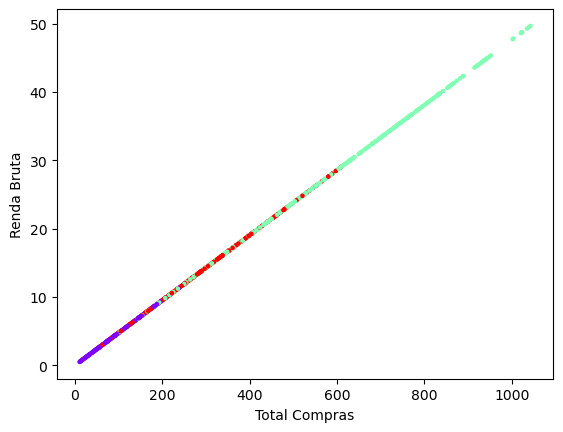

In [23]:
plt.scatter(data_v1_label['Total'],data_v1_label['gross income'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Total Compras')
plt.ylabel('Renda Bruta')
plt.show()

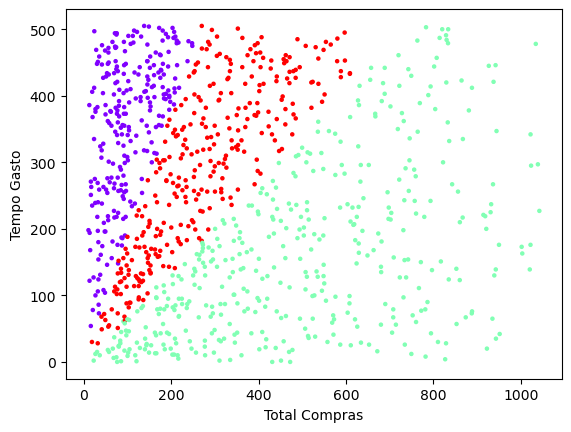

In [24]:
plt.scatter(data_v1_label['Total'],data_v1_label['Time'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Total Compras')
plt.ylabel('Tempo Gasto')
plt.show()

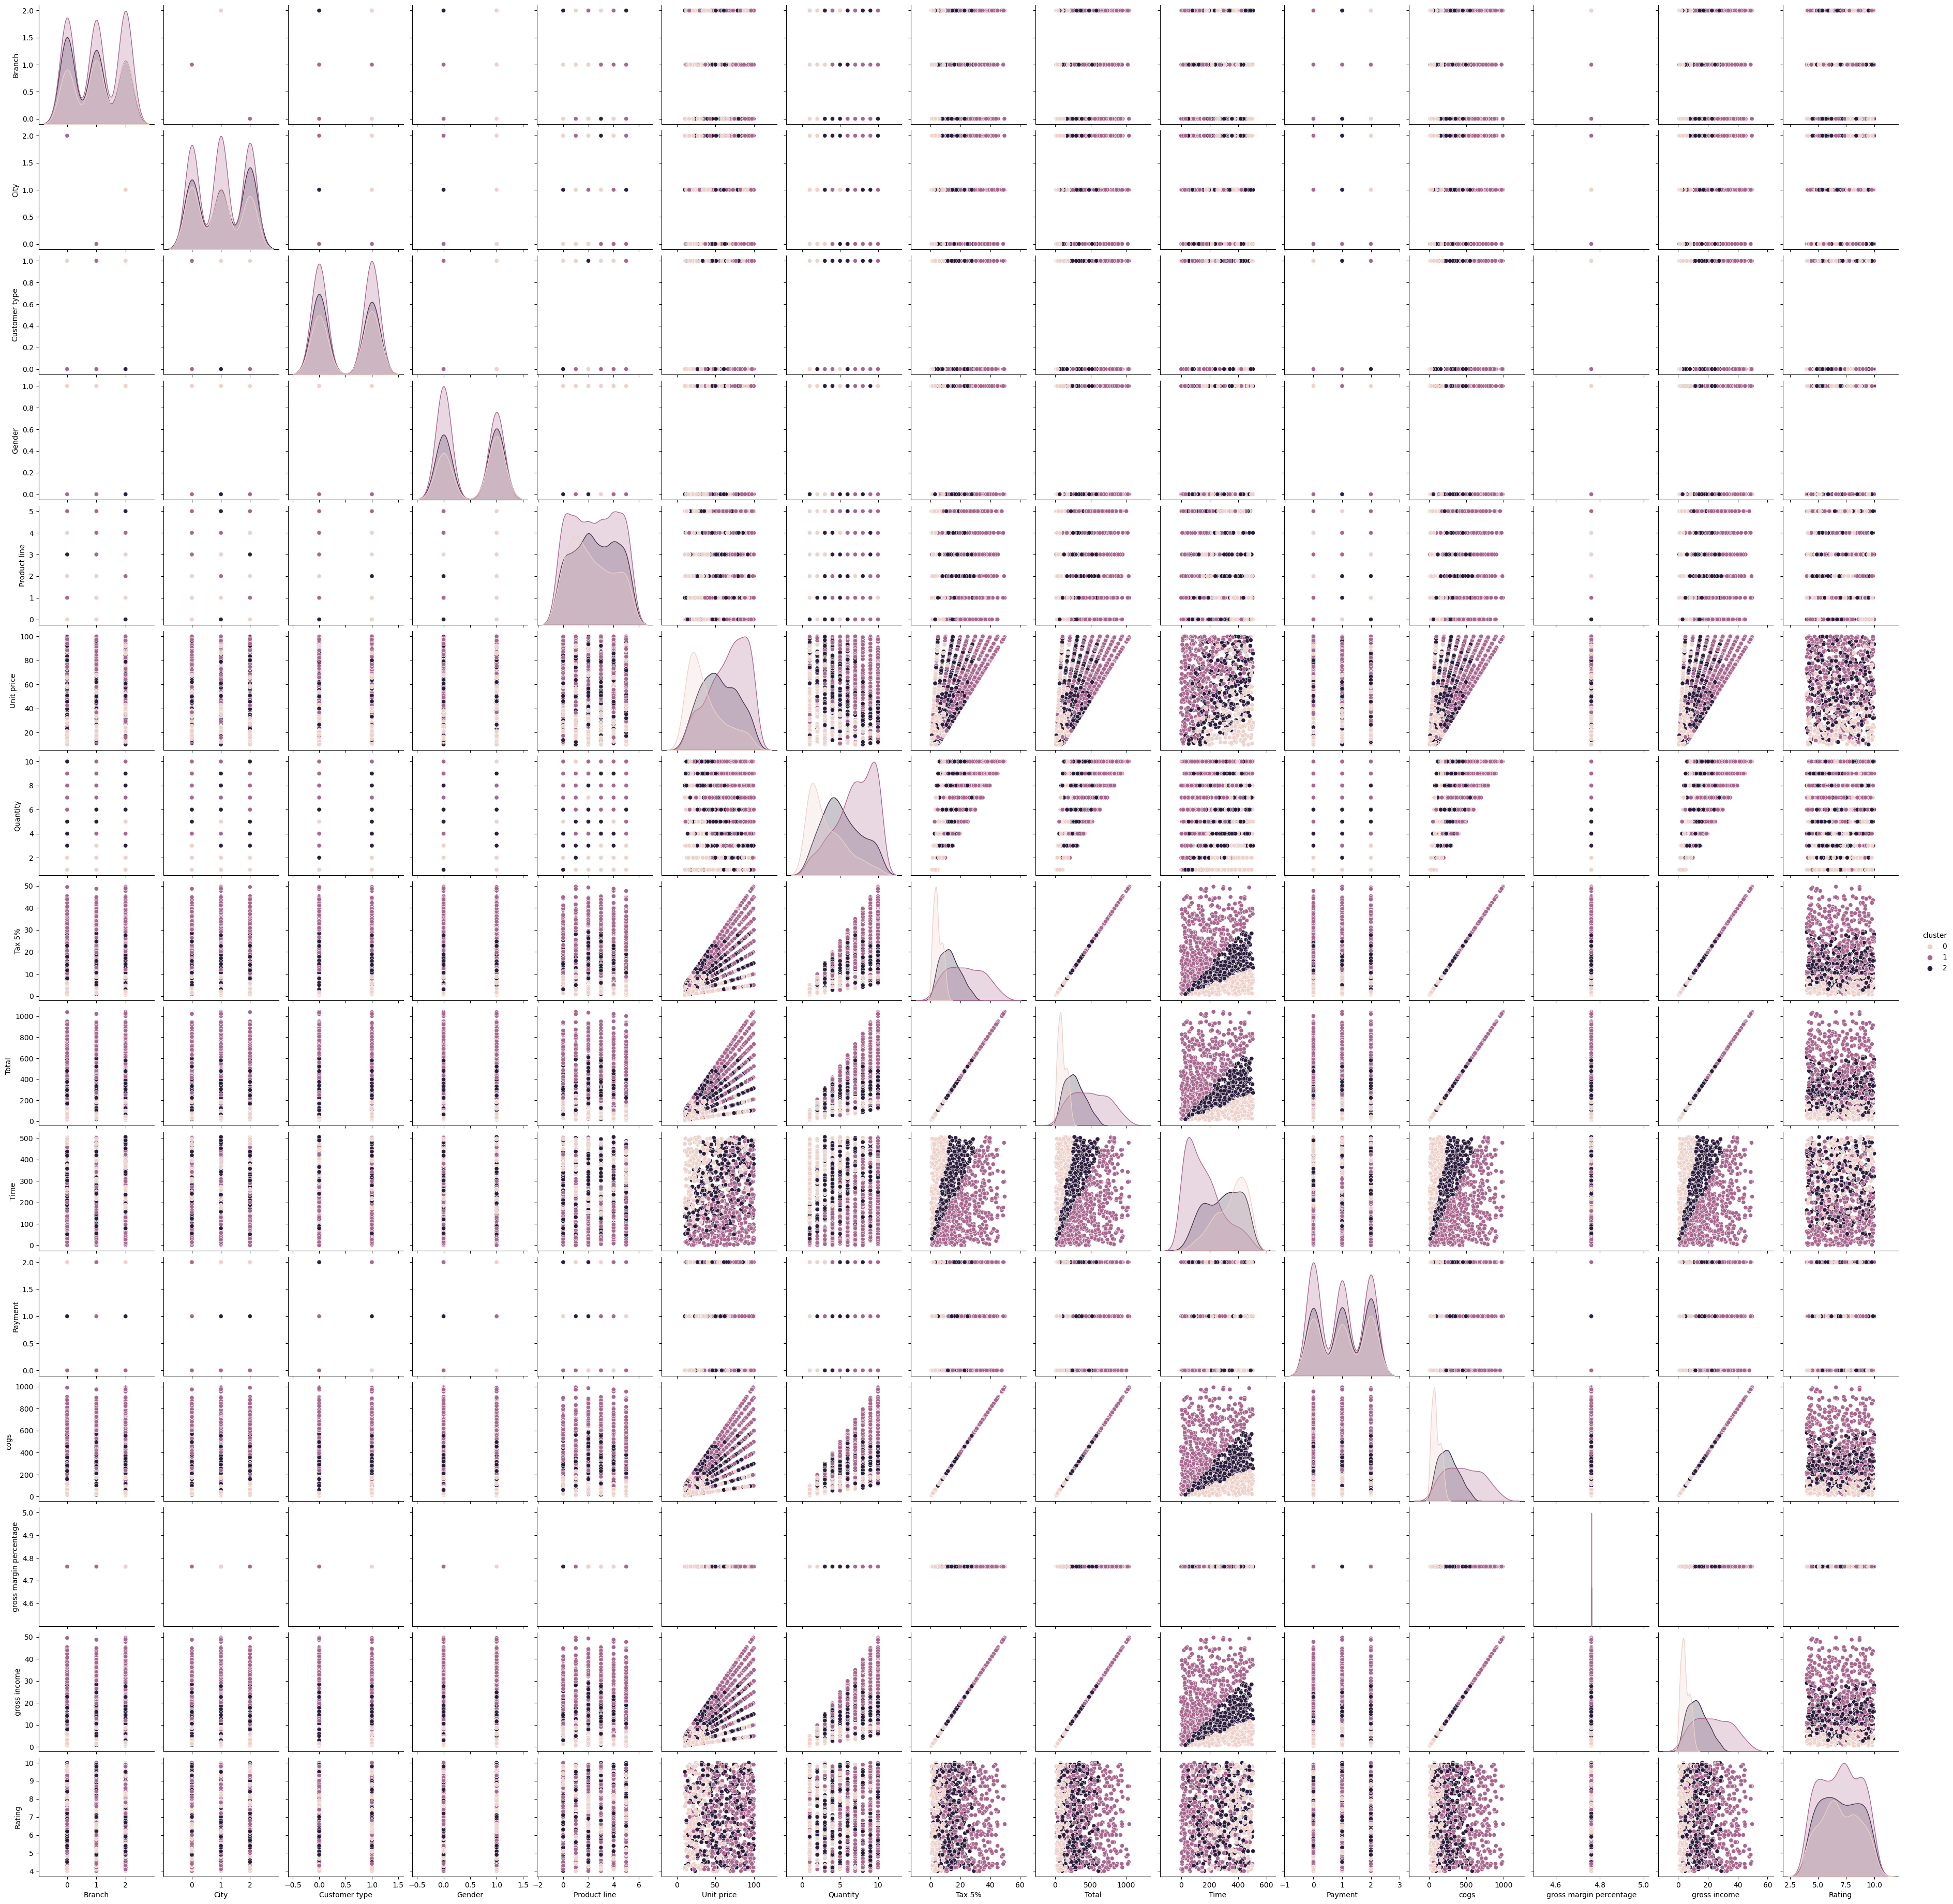

In [25]:
data_v1_label['cluster'] = labels
sns.pairplot(data_v1_label[0:], hue='cluster')

#### Conclusion about visualization
In these views created to look for the patterns generated with the clustering, we can see that it is difficult for this case and dataset, to find patterns and to have insights for the groupings, for this we will make an approach by calculating the variance of the centroids because in this way we will find the variables that have the greatest percentage difference and can bring important characteristics

In [30]:
centroids = kmeans.cluster_centers_
max = len(centroids[0])
for i in range(max):
    print(data_v1_label.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

Branch 
0.0000
City 
0.0000
Customer type 
0.0000
Gender 
0.0000
Product line 
0.0000
Unit price 
0.0001
Quantity 
0.0000
Tax 5% 
0.0001
Total 
0.0327
Time 
0.0794
Payment 
0.0000
cogs 
0.0296
gross margin percentage 
0.0000
gross income 
0.0001
Rating 
0.0000


For this dataser we had a very small margin of variation difference, the variable "cogs" had a highlighted variance but we are not going to use it, because it is a characteristic of product costs and in this case we want to focus on customers' purchases and not in spending on products, let's analyze the following features 'Total','Time','gross income'.

In [31]:
## Create a segmentation with the variabes

description = data_v1_label.groupby('cluster')['Total','Time','gross income']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

Total        Time  gross income  n_clients
cluster                                                 
0        100.879054  352.162162      4.803764        259
1        492.129248  159.097902     23.434726        429
2        274.729572  293.951923     13.082361        312

Cluster 0 : Customers who spend less on purchases. Customers who spend more time in the supermarket. They are the smallest number of aware. They are the lowest-income customers.

Cluster 1 : Customers who spend the most on purchases. Customers who spend less time in the supermarket. They are the largest number of customers. Are high-income customers.

Cluster 2: Clients that behave averagely between Cluster 0 and 1.

# Final 

Within this study, we carried out checks on the type of data in the set, missing data, analysis of categorical and numerical variables, we performed the application of the k-means algorithm to segment groups of customers based on data and their behaviors and it was identified with 3 groups being They are customers who shop, but remain in the supermarket for the longest time, and customers who buy more are those who spend less time in the supermarket.

Some insights may be gained from this study, the marketing area can carry out focused campaigns both for these customers who remain in the market for a long time, but with less buying behavior, such as carrying out promotions aimed at the products that they are most looking to consume to attract more customers. to reach purchases and for customers who we can say are the best, because they are the biggest buyers in the group to attract them to stay longer in the supermarket, so they are more likely to consume more products.